In [1]:
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import pandas as pd
import numpy as np
import copy
import os

## Radar Plot

In [2]:
os.chdir('')
df_xgb = pd.read_csv('xgb_results_summary.csv')
df_rf = pd.read_csv('rf_results_summary.csv')
df_lasso = pd.read_csv('lasso_results_summary.csv')
# os.chdir('')
# df_xgb = pd.read_csv('xgb_results_summary_no_tuning.csv')
# df_rf = pd.read_csv('rf_results_summary_no_tuning.csv')
# df_lasso = pd.read_csv('lasso_results_summary_no_tuning.csv')

In [3]:
ls_agg = list()
for i in range(len(df_xgb)):
    pers_val = df_xgb.loc[i, 'Personality']
    if pers_val[0:3] == 'cat':
        pers_categ = 'Maladaptive Trait'
    else:
        pers_categ = 'Adaptive Trait'
    
    pers_val = pers_val[3:len(pers_val)]
    if pers_val == 'Neuroticism':
        pers_val = 'Emotional Stability'
    
    if pers_val == 'NegativeAffectivity':
        pers_val = 'Negative Affectivity'
    mse_val = round(df_xgb.loc[i, 'MSE'],2)
    mape_val = round(df_xgb.loc[i, 'MAE'],2)
    ls_agg_row = [pers_val, pers_categ, 'XGB', mse_val, 'MSE']
    ls_agg.append(ls_agg_row)
    ls_agg_row = [pers_val, pers_categ, 'XGB', mape_val, 'MAE']
    ls_agg.append(ls_agg_row)
    
for i in range(len(df_rf)):
    pers_val = df_rf.loc[i, 'Personality']
    if pers_val[0:3] == 'cat':
        pers_categ = 'Maladaptive Trait'
    else:
        pers_categ = 'Adaptive Trait'
    
    pers_val = pers_val[3:len(pers_val)]
    if pers_val == 'Neuroticism':
        pers_val = 'Emotional Stability'
    
    if pers_val == 'NegativeAffectivity':
        pers_val = 'Negative Affectivity'
    mse_val = round(df_rf.loc[i, 'MSE'],2)
    mape_val = round(df_rf.loc[i, 'MAE'],2)
    ls_agg_row = [pers_val, pers_categ, 'RF', mse_val, 'MSE']
    ls_agg.append(ls_agg_row)
    ls_agg_row = [pers_val, pers_categ, 'RF', mape_val, 'MAE']
    ls_agg.append(ls_agg_row)
    
for i in range(len(df_lasso)):
    pers_val = df_lasso.loc[i, 'Personality']
    if pers_val[0:3] == 'cat':
        pers_categ = 'Maladaptive Trait'
    else:
        pers_categ = 'Adaptive Trait'
    
    pers_val = pers_val[3:len(pers_val)]
    if pers_val == 'Neuroticism':
        pers_val = 'Emotional Stability'
    
    if pers_val == 'NegativeAffectivity':
        pers_val = 'Negative Affectivity'
    mse_val = round(df_lasso.loc[i, 'MSE'],2)
    mape_val = round(df_lasso.loc[i, 'MAE'],2)
    ls_agg_row = [pers_val, pers_categ, 'Lasso', mse_val, 'MSE']
    ls_agg.append(ls_agg_row)
    ls_agg_row = [pers_val, pers_categ, 'Lasso', mape_val, 'MAE']
    ls_agg.append(ls_agg_row)

In [4]:
df_agg = pd.DataFrame(ls_agg, columns = ['Personality', 'Type', 'Model', 'Value', 'Metric'])
df_agg

,Personality,Type,Model,Value,Metric
0,Antagonism,Maladaptive Trait,XGB,0.25,MSE
1,Antagonism,Maladaptive Trait,XGB,0.36,MAE
2,Detachment,Maladaptive Trait,XGB,0.42,MSE
3,Detachment,Maladaptive Trait,XGB,0.51,MAE
4,Disinhibition,Maladaptive Trait,XGB,0.32,MSE
5,Disinhibition,Maladaptive Trait,XGB,0.46,MAE
6,Negative Affectivity,Maladaptive Trait,XGB,0.44,MSE
7,Negative Affectivity,Maladaptive Trait,XGB,0.55,MAE
8,Psychoticism,Maladaptive Trait,XGB,0.31,MSE
9,Psychoticism,Maladaptive Trait,XGB,0.42,MAE


In [5]:
pers_names = ['Antagonism',
              'Negative Affectivity',
              'Disinhibition',
              'Detachment',         
              'Psychoticism',
              'Agreeableness',
              'Emotional Stability',
              'Conscientiousness',
              'Extraversion',             
              'Openness'
             ]
rf_mse = list()
rf_mape = list()
xgb_mse = list()
xgb_mape = list()
lasso_mse = list()
lasso_mape = list()

In [6]:
for pers_name in pers_names:
    df_sub = df_agg[(df_agg['Personality'] == pers_name) & (df_agg['Model'] == 'RF') &(df_agg['Metric'] == 'MSE')]
    rf_mse.append(df_sub['Value'].tolist()[0])

In [7]:
for pers_name in pers_names:
    df_sub = df_agg[(df_agg['Personality'] == pers_name) & (df_agg['Model'] == 'RF') &(df_agg['Metric'] == 'MAE')]
    rf_mape.append(df_sub['Value'].tolist()[0])

In [8]:
for pers_name in pers_names:
    df_sub = df_agg[(df_agg['Personality'] == pers_name) & (df_agg['Model'] == 'XGB') &(df_agg['Metric'] == 'MSE')]
    xgb_mse.append(df_sub['Value'].tolist()[0])

In [9]:
for pers_name in pers_names:
    df_sub = df_agg[(df_agg['Personality'] == pers_name) & (df_agg['Model'] == 'XGB') &(df_agg['Metric'] == 'MAE')]
    xgb_mape.append(df_sub['Value'].tolist()[0])

In [10]:
for pers_name in pers_names:
    df_sub = df_agg[(df_agg['Personality'] == pers_name) & (df_agg['Model'] == 'Lasso') &(df_agg['Metric'] == 'MSE')]
    lasso_mse.append(df_sub['Value'].tolist()[0])

In [11]:
for pers_name in pers_names:
    df_sub = df_agg[(df_agg['Personality'] == pers_name) & (df_agg['Model'] == 'Lasso') &(df_agg['Metric'] == 'MAE')]
    lasso_mape.append(df_sub['Value'].tolist()[0])

In [12]:
angles = np.linspace(0, 2 * np.pi, len(pers_names), endpoint = False)
pers_names_close = np.concatenate((pers_names, [pers_names[0]]))
rf_mse_close = np.concatenate((rf_mse, [rf_mse[0]]))
rf_mape_close = np.concatenate((rf_mape, [rf_mape[0]]))
rf_avg_close = (np.array(rf_mse_close) + np.array(rf_mape_close)) / 2
xgb_mse_close = np.concatenate((xgb_mse, [xgb_mse[0]]))
xgb_mape_close = np.concatenate((xgb_mape, [xgb_mape[0]]))
xgb_avg_close = (np.array(xgb_mse_close) + np.array(xgb_mape_close)) / 2
lasso_mse_close = np.concatenate((lasso_mse, [lasso_mse[0]]))
lasso_mape_close = np.concatenate((lasso_mape, [lasso_mape[0]]))
lasso_avg_close = (np.array(lasso_mse_close) + np.array(lasso_mape_close)) / 2
angles_close = np.concatenate((angles, [angles[0]]))

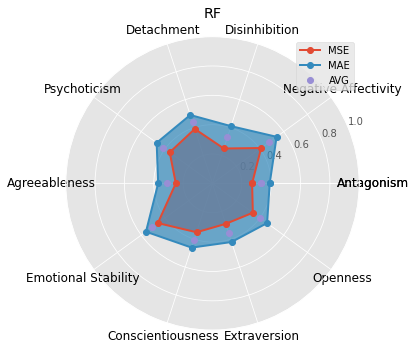

In [13]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(5.4, 5.4))
ax = fig.add_subplot(111, polar = True)
ax.plot(angles_close, rf_mse_close, 'o-', linewidth = 2, label = 'MSE')
ax.fill(angles_close, rf_mse_close, alpha = 0.7)
ax.plot(angles_close, rf_mape_close, 'o-', linewidth = 2, label = 'MAE')
ax.fill(angles_close, rf_mape_close, alpha = 0.7)
ax.plot(angles_close, rf_avg_close, 'o', linewidth = 2, label = 'AVG')
ax.set_thetagrids(angles_close * 180/np.pi, pers_names_close)
ax.set_ylim(0, 1)
ax.set_xticklabels(pers_names_close, color="k", size=12)
plt.title('RF')
plt.legend(loc='best')
ax.grid(True)
plt.savefig('radar_rf.png', bbox_inches='tight', dpi = 300)

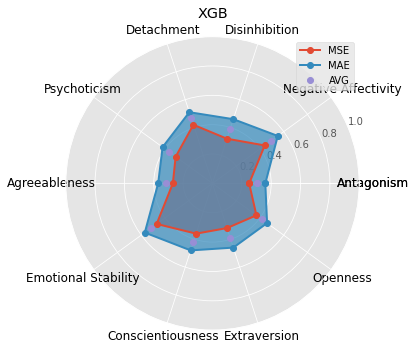

In [14]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(5.4, 5.4))
ax = fig.add_subplot(111, polar = True)
ax.plot(angles_close, xgb_mse_close, 'o-', linewidth = 2, label = 'MSE')
ax.fill(angles_close, xgb_mse_close, alpha = 0.7)
ax.plot(angles_close, xgb_mape_close, 'o-', linewidth = 2, label = 'MAE')
ax.fill(angles_close, xgb_mape_close, alpha = 0.7)
ax.plot(angles_close, xgb_avg_close, 'o', linewidth = 2, label = 'AVG')
ax.set_thetagrids(angles_close * 180/np.pi, pers_names_close)
ax.set_ylim(0, 1)
ax.set_xticklabels(pers_names_close, color="k", size=12)
plt.title('XGB')
plt.legend(loc='best')
ax.grid(True)
plt.savefig('radar_xgb.png', bbox_inches='tight', dpi = 300)

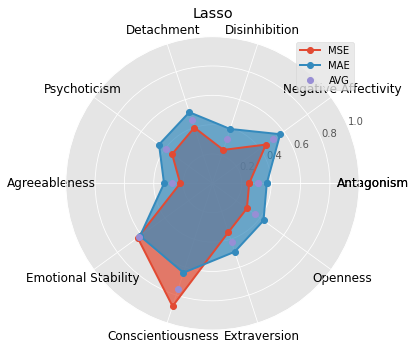

In [15]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(5.4, 5.4))
ax = fig.add_subplot(111, polar = True)
ax.plot(angles_close, lasso_mse_close, 'o-', linewidth = 2, label = 'MSE')
ax.fill(angles_close, lasso_mse_close, alpha = 0.7)
ax.plot(angles_close, lasso_mape_close, 'o-', linewidth = 2, label = 'MAE')
ax.fill(angles_close, lasso_mape_close, alpha = 0.7)
ax.plot(angles_close, lasso_avg_close, 'o', linewidth = 2, label = 'AVG')
ax.set_thetagrids(angles_close * 180/np.pi, pers_names_close)
ax.set_ylim(0, 1)
ax.set_xticklabels(pers_names_close, color="k", size=12)
plt.title('Lasso')
plt.legend(loc='best')
ax.grid(True)
plt.savefig('radar_lasso.png', bbox_inches='tight', dpi = 300)

## Density Plot

In [5]:
data_path = ''
os.chdir(data_path)
file_name = 'ml_input.csv'
df_ml = pd.read_csv('ml_input.csv', index_col = 0)
df_ml['neoNeuroticism'] = 4 - np.array(df_ml['neoNeuroticism'].tolist())
df_ml.head()

,phone_activity_recognition_rapids_durationstationary_mean,phone_activity_recognition_rapids_durationstationary_max,phone_activity_recognition_rapids_durationstationary_min,phone_activity_recognition_rapids_durationstationary_std,phone_activity_recognition_rapids_count_mean,phone_activity_recognition_rapids_count_max,phone_activity_recognition_rapids_count_min,phone_activity_recognition_rapids_count_std,phone_activity_recognition_rapids_mostcommonactivity_mean,phone_activity_recognition_rapids_mostcommonactivity_max,...,neoConscientiousness,neoNeuroticism,neoExtraversion,neoAgreeableness,neoOpenness,catNegativeAffectivity,catDetachment,catAntagonism,catDisinhibition,catPsychoticism
181,598.446864,735.183767,336.896067,107.712063,124.294118,339.0,58.0,59.514471,3.000000,3.0,...,3.166667,1.375000,2.416667,2.958333,3.250000,2.306548,2.053571,0.804762,1.119048,2.764286
182,1003.284491,1407.300467,302.764150,292.997907,68.687500,106.0,12.0,27.858389,3.500000,7.0,...,2.750000,2.375000,1.833333,3.083333,2.583333,0.831548,1.470238,0.602381,1.372024,1.491667
191,617.487515,760.764183,225.965467,129.426364,97.333333,146.0,31.0,26.491089,3.000000,3.0,...,3.250000,3.333333,2.250000,3.500000,2.583333,0.286905,1.904762,0.088690,0.963542,0.166667
200,498.135960,698.693833,4.999917,170.407851,170.055556,262.0,1.0,68.377605,3.444444,7.0,...,3.125000,2.708333,2.333333,3.500000,2.000000,0.202976,1.952381,0.081548,1.137649,0.127381
203,531.489468,758.688233,7.001317,171.131974,103.166667,156.0,1.0,36.720037,3.000000,3.0,...,3.333333,2.375000,2.500000,3.291667,2.000000,1.596429,1.470238,0.347619,1.191964,0.190476


In [6]:
Openness = df_ml['neoOpenness'].tolist()
Neuroticism = df_ml['neoNeuroticism'].tolist()
Conscientiousness = df_ml['neoConscientiousness'].tolist()
Agreeableness = df_ml['neoAgreeableness'].tolist()
Extraversion = df_ml['neoExtraversion'].tolist()
Psychoticism = df_ml['catPsychoticism'].tolist()
Disinhibition = df_ml['catDisinhibition'].tolist()
Detachment = df_ml['catDetachment'].tolist()
Antagonism = df_ml['catAntagonism'].tolist()
NegativeAffectivity = df_ml['catNegativeAffectivity'].tolist()

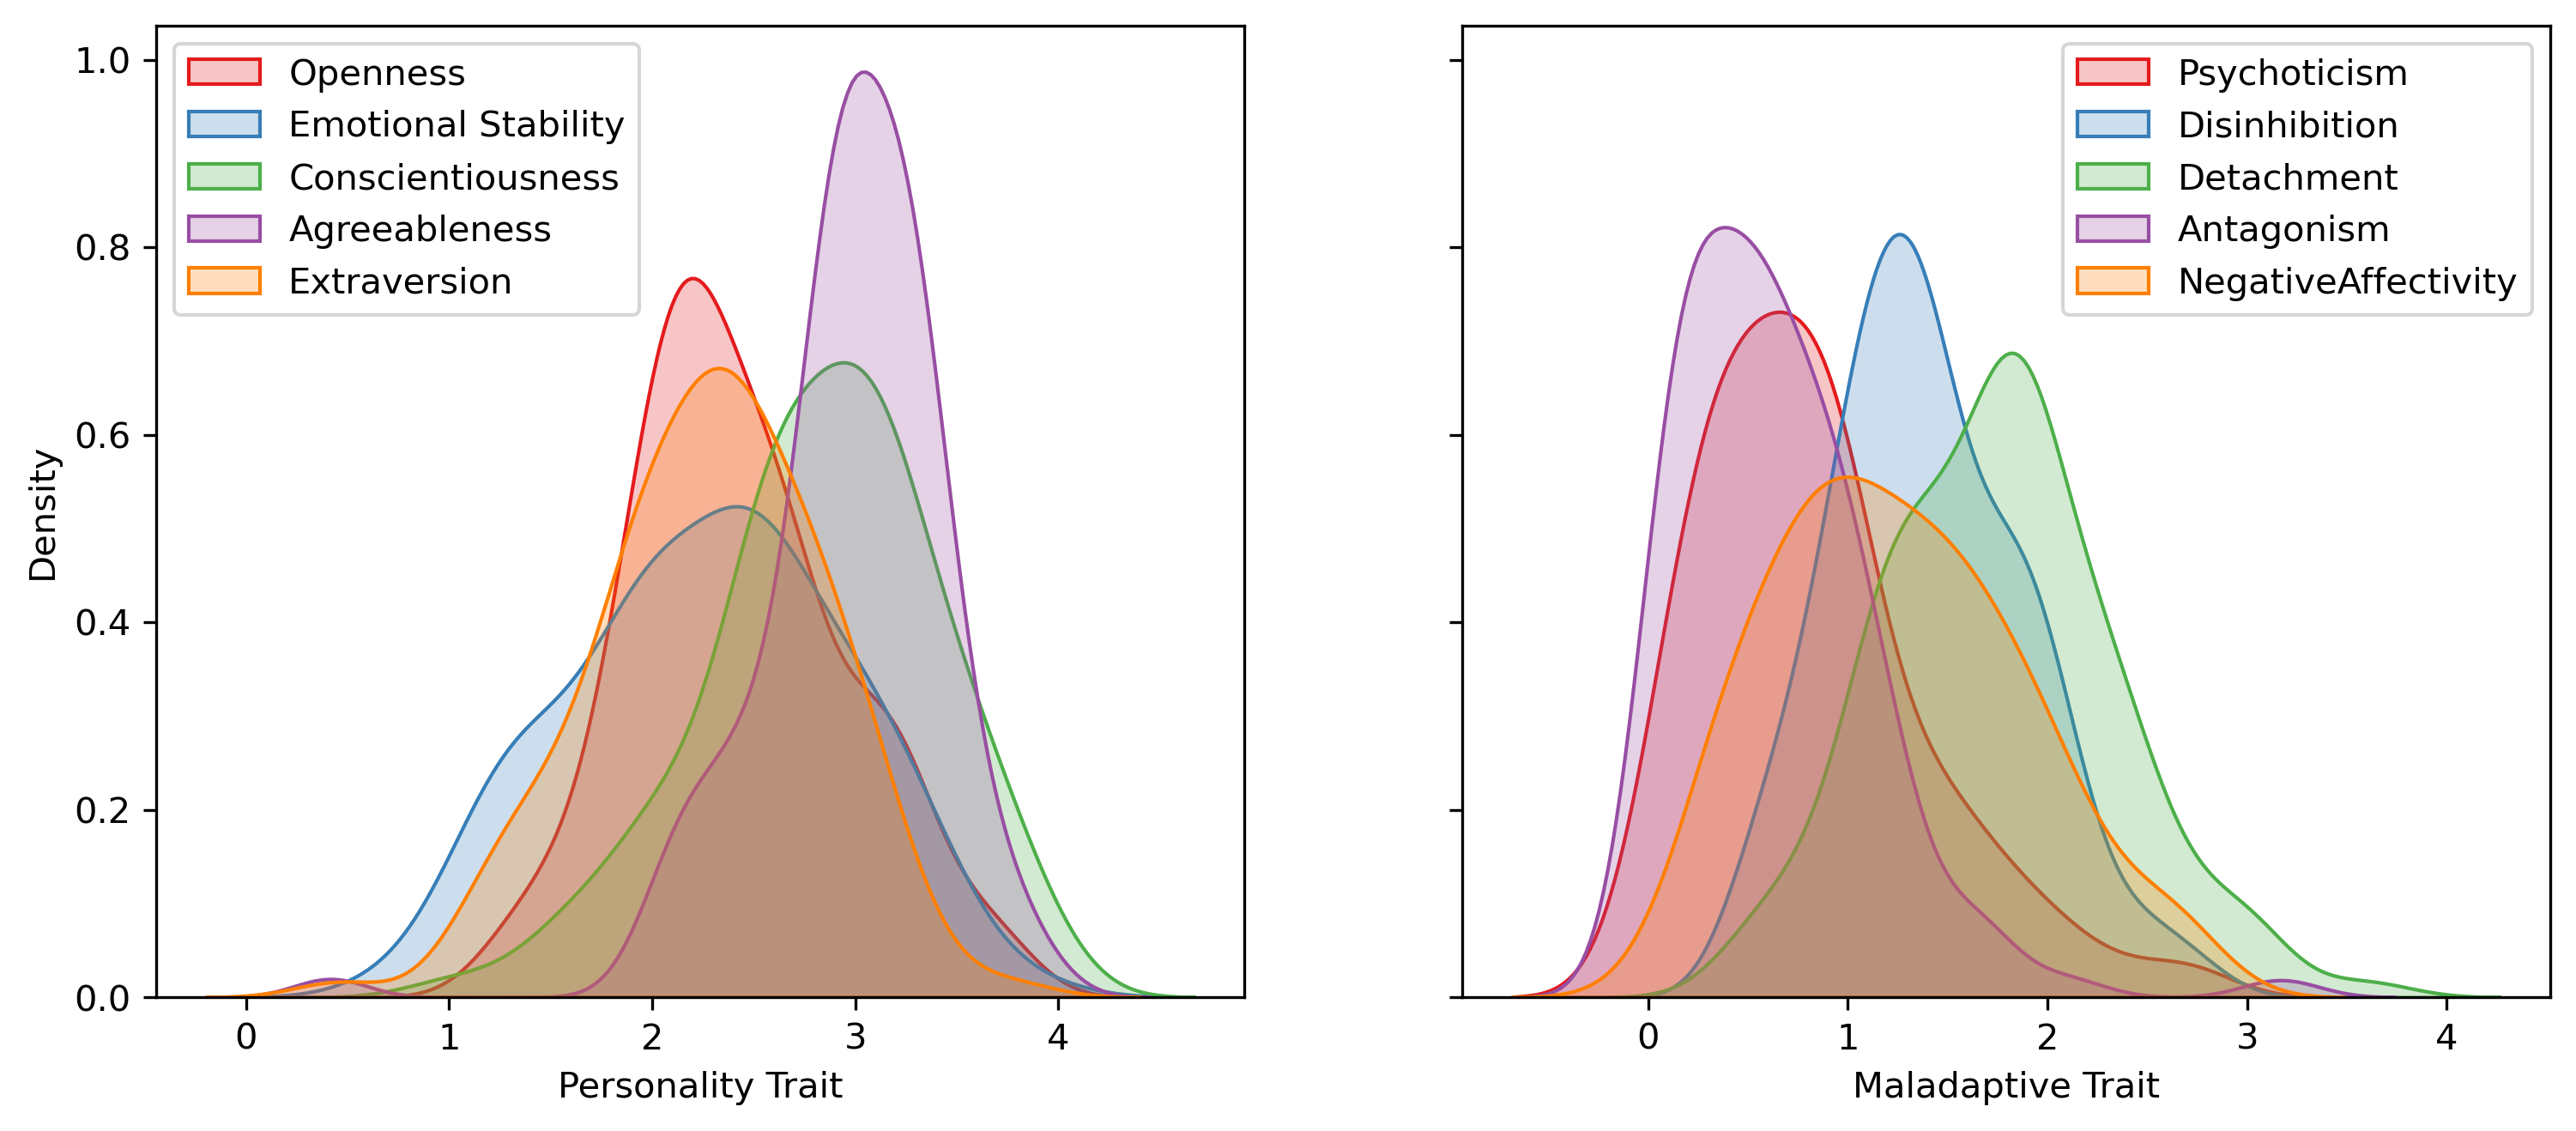

In [7]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12, 5), dpi = 300)
c1, c2, c3, c4, c5 = sns.color_palette('Set1', 5)

sns.kdeplot(Openness, shade = True, color = c1, legend = True, label = 'Openness', ax = ax1)
sns.kdeplot(Neuroticism, shade = True, color = c2, legend = True, label = 'Emotional Stability', ax = ax1)
sns.kdeplot(Conscientiousness, shade = True, color = c3, legend = True, label = 'Conscientiousness', ax = ax1)
sns.kdeplot(Agreeableness, shade = True, color = c4, legend = True, label = 'Agreeableness', ax = ax1)
sns.kdeplot(Extraversion, shade = True, color = c5, legend = True, label = 'Extraversion', ax= ax1)
ax1.set_xlabel('Personality Trait')
ax1.legend(loc='upper left')

sns.kdeplot(Psychoticism, shade = True, color = c1, legend = True, label = 'Psychoticism', ax = ax2)
sns.kdeplot(Disinhibition, shade = True, color = c2, legend = True, label = 'Disinhibition', ax = ax2)
sns.kdeplot(Detachment, shade = True, color = c3, legend = True, label = 'Detachment', ax = ax2)
sns.kdeplot(Antagonism, shade = True, color = c4, legend = True, label = 'Antagonism', ax = ax2)
sns.kdeplot(NegativeAffectivity, shade = True, color = c5, legend = True, label = 'NegativeAffectivity', ax = ax2)
ax2.set_xlabel('Maladaptive Trait')
ax2.legend()
f.savefig('DensityPlot.png', bbox_inches='tight', dpi=300)

## Histogram distribution plot

In [2]:
data_path = ''
os.chdir(data_path)
file_name = 'ml_input.csv'
df_ml = pd.read_csv(file_name, index_col = 0)
df_ml['neoNeuroticism'] = 4 - np.array(df_ml['neoNeuroticism'].tolist())
df_ml.head()

,phone_activity_recognition_rapids_durationstationary_mean,phone_activity_recognition_rapids_durationstationary_max,phone_activity_recognition_rapids_durationstationary_min,phone_activity_recognition_rapids_durationstationary_std,phone_activity_recognition_rapids_count_mean,phone_activity_recognition_rapids_count_max,phone_activity_recognition_rapids_count_min,phone_activity_recognition_rapids_count_std,phone_activity_recognition_rapids_mostcommonactivity_mean,phone_activity_recognition_rapids_mostcommonactivity_max,...,neoConscientiousness,neoNeuroticism,neoExtraversion,neoAgreeableness,neoOpenness,catNegativeAffectivity,catDetachment,catAntagonism,catDisinhibition,catPsychoticism
181,598.446864,735.183767,336.896067,107.712063,124.294118,339.0,58.0,59.514471,3.000000,3.0,...,3.166667,1.375000,2.416667,2.958333,3.250000,2.306548,2.053571,0.804762,1.119048,2.764286
182,1003.284491,1407.300467,302.764150,292.997907,68.687500,106.0,12.0,27.858389,3.500000,7.0,...,2.750000,2.375000,1.833333,3.083333,2.583333,0.831548,1.470238,0.602381,1.372024,1.491667
191,617.487515,760.764183,225.965467,129.426364,97.333333,146.0,31.0,26.491089,3.000000,3.0,...,3.250000,3.333333,2.250000,3.500000,2.583333,0.286905,1.904762,0.088690,0.963542,0.166667
200,498.135960,698.693833,4.999917,170.407851,170.055556,262.0,1.0,68.377605,3.444444,7.0,...,3.125000,2.708333,2.333333,3.500000,2.000000,0.202976,1.952381,0.081548,1.137649,0.127381
203,531.489468,758.688233,7.001317,171.131974,103.166667,156.0,1.0,36.720037,3.000000,3.0,...,3.333333,2.375000,2.500000,3.291667,2.000000,1.596429,1.470238,0.347619,1.191964,0.190476


In [4]:
ml_pers_names = ['catAntagonism', 'neoAgreeableness', 'catNegativeAffectivity', 'neoNeuroticism', 'catDisinhibition', 'neoConscientiousness', 'catDetachment', 'neoExtraversion', 'catPsychoticism', 'neoOpenness']
ml_pers_name_new = ['Antagonism', 'Detachment', 'Disinhibition', 'Negative Affectivity', 'Psychoticism', 'Agreeableness', 'Extraversion', 'Conscientiousness', 'Emotional Stability', 'Openness']
level_names = ['L', 'M', 'H']
ls_ml_level = list()
for ml_pers_name in ml_pers_names:
    pers_name = ml_pers_name[3: len(ml_pers_name)]
    for value in df_ml[ml_pers_name].tolist():
        if value <= 1:
            level = 'L'
        elif 1 < value < 3:
            level = 'M'
        else:
            level = 'H'
        
        if pers_name == 'Neuroticism':
            pers_name = 'Emotional Stability'
        
        if pers_name == 'NegativeAffectivity':
            pers_name = 'Negative Affectivity'
            
        ls_ml_level.append([pers_name, level])
        
df_ml_level = pd.DataFrame(ls_ml_level, columns = ['Trait', 'Level'])

In [5]:
ls_ml_agg = list()
for ml_pers_name in ml_pers_name_new:
    for level in level_names:
        df_sel_pers = df_ml_level[df_ml_level['Trait'] == ml_pers_name]
        df_sel_level = df_sel_pers[df_sel_pers['Level'] == level]
        ls_ml_agg.append([ml_pers_name, level, len(df_sel_level)])
        
df_ml_agg = pd.DataFrame(ls_ml_agg, columns = ['Trait', 'Level', 'Count'])

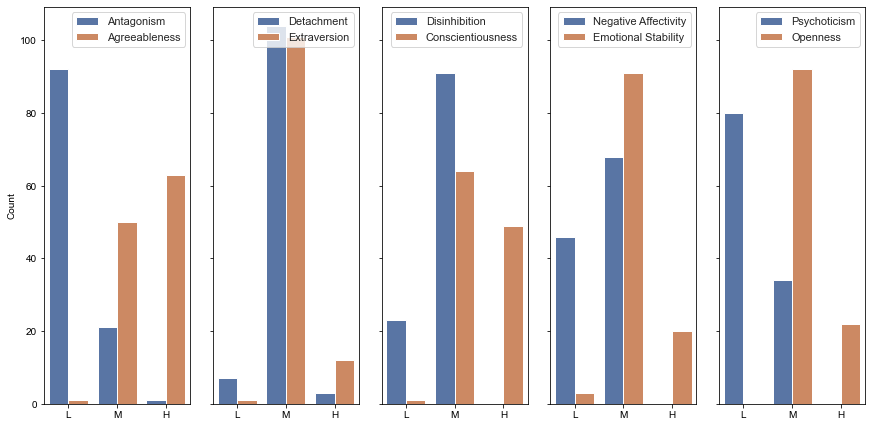

In [6]:
fig, axes = plt.subplots(1, 5, figsize=(12,6), sharey=True, constrained_layout=True)
for i in range(5):
    pers_name = ml_pers_name_new[i]
    maldap_name = ml_pers_name_new[i + 5]
    df_sel_plot = df_ml_agg[df_ml_agg['Trait'].isin([pers_name, maldap_name])]
    ax = axes[i]
    sns.set_theme(style="whitegrid")
    sns.barplot(x="Level", y="Count", hue="Trait", data=df_sel_plot, ax = ax)
    ax.legend()
    ax.set_xlabel(" ")
    if i != 0:
        ax.set_ylabel(" ")

os.chdir('/Users/ry4jr/Library/Mobile Documents/com~apple~CloudDocs/AAPEX/results/figs')
plt.savefig("histogram distribution plot.png", dpi = 300)